# Quiz: Implementing a Decision Tree
# prep_terrain_data.py

In [4]:
#!/usr/bin/python
import random


def makeTerrainData(n_points=1000):
###############################################################################
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

#    training_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
#            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}


    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test
#    return training_data, test_data

# class_vis.py

In [5]:
#!/usr/bin/python

#from udacityplots import *
import warnings
warnings.filterwarnings("ignore")

import matplotlib
#matplotlib.use('agg')

import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
%matplotlib inline

def prettyPicture(clf, X_test, y_test):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

    plt.savefig("test.png")


    plt.show()



# ClassifyDT.py

In [7]:
def classify(features_train, labels_train):
    
    ### your code goes here--should return a trained decision tree classifer
    from sklearn import tree
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(features_train, labels_train)
    
    return clf

# studentMain.py

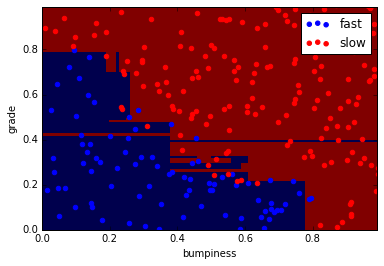

In [11]:
#!/usr/bin/python

""" lecture and example code for decision tree unit """

import sys

import matplotlib.pyplot as plt
import numpy as np
import pylab as pl

features_train, labels_train, features_test, labels_test = makeTerrainData()



### the classify() function in classifyDT is where the magic
### happens--fill in this function in the file 'classifyDT.py'!
clf = classify(features_train, labels_train)







#### grader code, do not modify below this line

prettyPicture(clf, features_test, labels_test)



# Quiz: [object Object]

In [14]:
import sys

import numpy as np
import pylab as pl

features_train, labels_train, features_test, labels_test = makeTerrainData()



#################################################################################


########################## DECISION TREE #################################



#### your code goes here


from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)

pred = clf.predict(features_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)

### be sure to compute the accuracy on the test set


    
def submitAccuracies():
  return {"acc":round(acc,3)}

print ('The accuracy is: %.3f' % acc)



The accuracy is: 0.912


# Quiz: Decision Tree Accuracy

In [19]:
import sys


import matplotlib.pyplot as plt
import numpy as np
import pylab as pl

features_train, labels_train, features_test, labels_test = makeTerrainData()



########################## DECISION TREE #################################


### your code goes here--now create 2 decision tree classifiers,
### one with min_samples_split=2 and one with min_samples_split=50
### compute the accuracies on the testing data and store
### the accuracy numbers to acc_min_samples_split_2 and
### acc_min_samples_split_50, respectively

def classify(features_train, labels_train):

    ### your code goes here--should return a trained decision tree classifer
    from sklearn import tree
    clf1 = tree.DecisionTreeClassifier(min_samples_split = 2)
    clf1 = clf1.fit(features_train, labels_train)
    clf2 = tree.DecisionTreeClassifier(min_samples_split = 50)
    clf2 = clf2.fit(features_train, labels_train)
    

    return [clf1, clf2]
    

clf = classify(features_train, labels_train)

pred1 = clf[0].predict(features_test)
pred2 = clf[1].predict(features_test)

from sklearn.metrics import accuracy_score
acc_min_samples_split_2 = accuracy_score(labels_test, pred1)
acc_min_samples_split_50 = accuracy_score(labels_test, pred2)


def submitAccuracies():
  return {"acc_min_samples_split_2":round(acc_min_samples_split_2,3),
          "acc_min_samples_split_50":round(acc_min_samples_split_50,3)}

print ('The accuracy for acc_min_samples_split_2 is: %.3f' % acc_min_samples_split_2)
print ('The accuracy for acc_min_samples_split_50 is: %.3f' % acc_min_samples_split_50)

The accuracy for acc_min_samples_split_2 is: 0.908
The accuracy for acc_min_samples_split_50 is: 0.912


# Mini-Project

# email_preproccess.py

In [23]:
#!/usr/bin/python

import pickle
import cPickle
import numpy

from sklearn import cross_validation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile, f_classif



def preprocess(words_file = "../ud120-projects/tools/word_data.pkl", authors_file="../ud120-projects/tools/email_authors.pkl"):
    """ 
        this function takes a pre-made list of email texts (by default word_data.pkl)
        and the corresponding authors (by default email_authors.pkl) and performs
        a number of preprocessing steps:
            -- splits into training/testing sets (10% testing)
            -- vectorizes into tfidf matrix
            -- selects/keeps most helpful features

        after this, the feaures and labels are put into numpy arrays, which play nice with sklearn functions

        4 objects are returned:
            -- training/testing features
            -- training/testing labels

    """

    ### the words (features) and authors (labels), already largely preprocessed
    ### this preprocessing will be repeated in the text learning mini-project
    authors_file_handler = open(authors_file, "r")
    authors = pickle.load(authors_file_handler)
    authors_file_handler.close()

    words_file_handler = open(words_file, "r")
    word_data = cPickle.load(words_file_handler)
    words_file_handler.close()

    ### test_size is the percentage of events assigned to the test set
    ### (remainder go into training)
    features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(word_data, authors, test_size=0.1, random_state=42)



    ### text vectorization--go from strings to lists of numbers
    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words='english')
    features_train_transformed = vectorizer.fit_transform(features_train)
    features_test_transformed  = vectorizer.transform(features_test)



    ### feature selection, because text is super high dimensional and 
    ### can be really computationally chewy as a result
    selector = SelectPercentile(f_classif, percentile=10)
    selector.fit(features_train_transformed, labels_train)
    features_train_transformed = selector.transform(features_train_transformed).toarray()
    features_test_transformed  = selector.transform(features_test_transformed).toarray()

    ### info on the data
    print "no. of Chris training emails:", sum(labels_train)
    print "no. of Sara training emails:", len(labels_train)-sum(labels_train)
    
    return features_train_transformed, features_test_transformed, labels_train, labels_test


# dt_author_id.py

In [24]:
#!/usr/bin/python

"""
    This is the code to accompany the Lesson 3 (decision tree) mini-project.

    Use a Decision Tree to identify emails from the Enron corpus by author:
    Sara has label 0
    Chris has label 1
"""

import sys
from time import time



### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()




#########################################################
### your code goes here ###

def classify(features_train, labels_train):

    from sklearn import tree
    clf = tree.DecisionTreeClassifier(min_samples_split = 40)
    clf = clf.fit(features_train, labels_train)

    return clf


clf = classify(features_train, labels_train)

pred = clf.predict(features_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)

print ''
print ('The accuracy is: %.2f' % acc)

print ('The number of features is: %i' % len(features_train[0]))
#########################################################


no. of Chris training emails: 7936
no. of Sara training emails: 7884
The accuracy is: 0.98
The number of features is: 3785


In [25]:
from time import time
def classify(features_train, labels_train, features_test, labels_test):
    """ compute the accuracy of your SVM classifier """
    ### import the sklearn module for SVM

    from sklearn.svm import SVC


    #features_train = features_train[:len(features_train)/100]
    #labels_train = labels_train[:len(labels_train)/100]

    clf = SVC(kernel="rbf", C=1e8)
    t0 = time()
    clf.fit(features_train, labels_train)
    fit_t = round(time()-t0, 3)

    t0 = time()
    pred = clf.predict(features_test)
    pred_t = round(time()-t0, 3)

    from sklearn.metrics import accuracy_score
    acc = (accuracy_score(pred, labels_test))*100
    return [fit_t, pred_t, acc, pred]

print ''
results = classify(features_train, labels_train, features_test, labels_test)
print ('The fit time is: %.2f s' % results[0])
print ('The training time is: %.2f s' % results[1])
print ('The accuracy is: %.2f' % results[2])



try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass


The fit time is: 79.30 s
The training time is: 6.19 s
The accuracy is: 96.42


ValueError: Number of features of the model must match the input. Model n_features is 3785 and input n_features is 2 